# EDA

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# import preprocessed clean tweet data 
tweets_df = pd.read_csv(r'data/preprocessed_tweets.csv') 
tweets_df.head()

,date,timezone,tweet,hashtags,username,name,day,hour,retweet,nlikes,nreplies,nretweets,tokens
0,2020-03-28 20:53:01,UTC,"Schlifke said, he and members of the CovidVent...",['#covid19'],KHNews,Kaiser Health News,4,3,False,0,0,1,schlifke say members covidvent coalition help ...
1,2020-03-28 19:15:01,UTC,Millions of Americans are seeking care by conn...,"['#covid19', '#telemedicine']",KHNews,Kaiser Health News,6,2,False,6,0,2,millions americans seek care connect doctor el...
2,2020-03-28 17:43:00,UTC,We're following the #coronaviruspandemic close...,"['#coronaviruspandemic', '#healthcare', '#heal...",KHNews,Kaiser Health News,5,4,False,0,0,1,follow closely bring best investigation surrou...
3,2020-03-28 16:43:00,UTC,About $100 billion of the funding is intended ...,"['#coronavirus', '#relieffunds', '#healthbent']",KHNews,Kaiser Health News,5,12,False,1,0,1,billion fund intend put reimburse eligible hea...
4,2020-03-28 14:43:00,UTC,Read KHN's top #COVID19 coverage: The U.S. mil...,['#covid19'],KHNews,Kaiser Health News,6,4,False,4,1,7,read khn coverage military fly specialize swab...


In [2]:
# convert datetime to date and add year column
tweets_df['date'] = pd.to_datetime(tweets_df['date'], errors='coerce')
tweets_df['year'] = tweets_df['date'].dt.year
tweets_df['date'] = tweets_df['date'].dt.date
tweets_df.head()

,date,timezone,tweet,hashtags,username,name,day,hour,retweet,nlikes,nreplies,nretweets,tokens,year
0,2020-03-28,UTC,"Schlifke said, he and members of the CovidVent...",['#covid19'],KHNews,Kaiser Health News,4,3,False,0,0,1,schlifke say members covidvent coalition help ...,2020
1,2020-03-28,UTC,Millions of Americans are seeking care by conn...,"['#covid19', '#telemedicine']",KHNews,Kaiser Health News,6,2,False,6,0,2,millions americans seek care connect doctor el...,2020
2,2020-03-28,UTC,We're following the #coronaviruspandemic close...,"['#coronaviruspandemic', '#healthcare', '#heal...",KHNews,Kaiser Health News,5,4,False,0,0,1,follow closely bring best investigation surrou...,2020
3,2020-03-28,UTC,About $100 billion of the funding is intended ...,"['#coronavirus', '#relieffunds', '#healthbent']",KHNews,Kaiser Health News,5,12,False,1,0,1,billion fund intend put reimburse eligible hea...,2020
4,2020-03-28,UTC,Read KHN's top #COVID19 coverage: The U.S. mil...,['#covid19'],KHNews,Kaiser Health News,6,4,False,4,1,7,read khn coverage military fly specialize swab...,2020


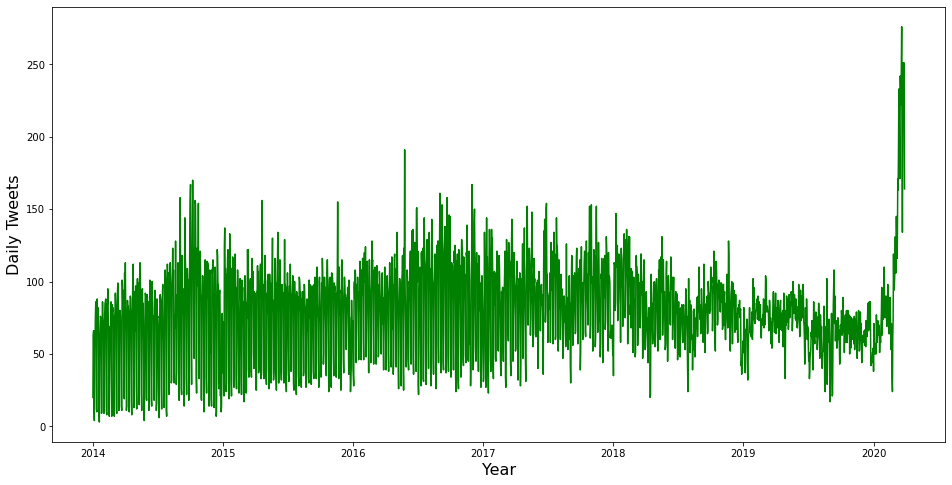

In [3]:
# plot tweet daily counts over time
tweets_df.groupby('date')['tweet'].count().plot(kind='line', color='green', figsize=(16,8))
plt.xlabel('Year', fontsize=16)
plt.ylabel('Daily Tweets', fontsize=16)
plt.show()

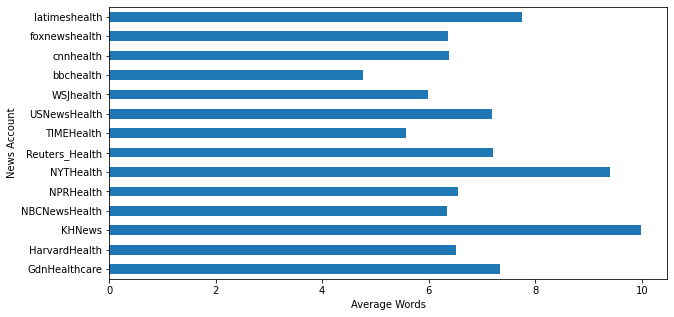

In [4]:
# calculate number of tokens for each tweet
tweets_df['ntokens'] =  tweets_df['tokens'].str.split().str.len()

# plot average word count by user
tweets_df.groupby('username')['ntokens'].mean().plot(kind='barh',figsize=(10,5))
plt.xlabel('Average Words')
plt.ylabel('News Account')
plt.show()

# STTM Pipeline

In [3]:
import gsdmm
import numpy as np
import pandas as pd
import pickle
import re

from gsdmm import MovieGroupProcess
from tqdm import tqdm

# load in data if needed 
# data_dir = '../data/preprocessed_tweets.csv'
# tweets_df = pd.read_csv(data_dir) 
tweets_df.head(5)

,date,timezone,tweet,hashtags,username,name,day,hour,retweet,nlikes,nreplies,nretweets,tokens
0,2020-03-28 20:53:01,UTC,"Schlifke said, he and members of the CovidVent...",['#covid19'],KHNews,Kaiser Health News,4,3,False,0,0,1,schlifke say members covidvent coalition help ...
1,2020-03-28 19:15:01,UTC,Millions of Americans are seeking care by conn...,"['#covid19', '#telemedicine']",KHNews,Kaiser Health News,6,2,False,6,0,2,millions americans seek care connect doctor el...
2,2020-03-28 17:43:00,UTC,We're following the #coronaviruspandemic close...,"['#coronaviruspandemic', '#healthcare', '#heal...",KHNews,Kaiser Health News,5,4,False,0,0,1,follow closely bring best investigation surrou...
3,2020-03-28 16:43:00,UTC,About $100 billion of the funding is intended ...,"['#coronavirus', '#relieffunds', '#healthbent']",KHNews,Kaiser Health News,5,12,False,1,0,1,billion fund intend put reimburse eligible hea...
4,2020-03-28 14:43:00,UTC,Read KHN's top #COVID19 coverage: The U.S. mil...,['#covid19'],KHNews,Kaiser Health News,6,4,False,4,1,7,read khn coverage military fly specialize swab...


In [4]:
# convert string of tokens into tokens list
tweets_df['tokens'] = tweets_df.tokens.apply(lambda x: re.split('\s', x))
tweets_df.head()

,date,timezone,tweet,hashtags,username,name,day,hour,retweet,nlikes,nreplies,nretweets,tokens
0,2020-03-28 20:53:01,UTC,"Schlifke said, he and members of the CovidVent...",['#covid19'],KHNews,Kaiser Health News,4,3,False,0,0,1,"[schlifke, say, members, covidvent, coalition,..."
1,2020-03-28 19:15:01,UTC,Millions of Americans are seeking care by conn...,"['#covid19', '#telemedicine']",KHNews,Kaiser Health News,6,2,False,6,0,2,"[millions, americans, seek, care, connect, doc..."
2,2020-03-28 17:43:00,UTC,We're following the #coronaviruspandemic close...,"['#coronaviruspandemic', '#healthcare', '#heal...",KHNews,Kaiser Health News,5,4,False,0,0,1,"[follow, closely, bring, best, investigation, ..."
3,2020-03-28 16:43:00,UTC,About $100 billion of the funding is intended ...,"['#coronavirus', '#relieffunds', '#healthbent']",KHNews,Kaiser Health News,5,12,False,1,0,1,"[billion, fund, intend, put, reimburse, eligib..."
4,2020-03-28 14:43:00,UTC,Read KHN's top #COVID19 coverage: The U.S. mil...,['#covid19'],KHNews,Kaiser Health News,6,4,False,4,1,7,"[read, khn, coverage, military, fly, specializ..."


In [8]:
# create a single list of tweet tokens
docs = tweets_df['tokens'].tolist()
docs[:3]  # view top 3 elements

[['schlifke',
  'say',
  'members',
  'covidvent',
  'coalition',
  'help',
  'organize',
  'federal',
  'executive',
  'order',
  'enable',
  'conversion',
  'surgery',
  'center',
  'hospital',
  'ors',
  'care',
  'sit'],
 ['millions',
  'americans',
  'seek',
  'care',
  'connect',
  'doctor',
  'electronically',
  'time'],
 ['follow',
  'closely',
  'bring',
  'best',
  'investigation',
  'surround',
  'outbreak',
  'read',
  'stories']]

In [12]:
%%time
# Train STTM model
#    K = number of potential topics
#    alpha = controls completeness
#    beta =  controls homogeneity 
#    n_iters = number of iterations
mgp = gsdmm.MovieGroupProcess(K=10, alpha=0.1, beta=0.5, n_iters=5)
vocab = set(x for doc in docs for x in doc)
n_terms = len(vocab)
y = mgp.fit(docs, n_terms)

# Save model
with open('dumps/trained_models/10clusters.model', 'wb') as f:
    pickle.dump(mgp, f)
    f.close()

In [6]:
# load in trained model 
filehandler = open('dumps/trained_models/10clusters.model', 'rb')
mgp = pickle.load(filehandler)

In [7]:
# define helper functions
def top_words(cluster_word_distribution, top_cluster, values):
    '''prints the top words in each cluster'''
    for cluster in top_cluster:
        sort_dicts =sorted(mgp.cluster_word_distribution[cluster].items(), key=lambda k: k[1], reverse=True)[:values]
        print('Cluster %s : %s'%(cluster,sort_dicts))
        print(' — — — — — — — — —')
        
def cluster_importance(mgp):
    '''returns a word-topic matrix[phi] where each value represents
    the word importance for that particular cluster;
    phi[i][w] would be the importance of word w in topic i.
    '''
    n_z_w = mgp.cluster_word_distribution
    beta, V, K = mgp.beta, mgp.vocab_size, mgp.K
    phi = [{} for i in range(K)]
    for z in range(K):
        for w in n_z_w[z]:
            phi[z][w] = (n_z_w[z][w]+beta)/(sum(n_z_w[z].values())+V*beta)
    return phi

def topic_allocation(df, docs, mgp, topic_dict):
    '''allocates all topics to each document in original dataframe,
    adding two columns for cluster number and cluster description'''
    topic_allocations = []
    for doc in tqdm(docs):
        topic_label, score = mgp.choose_best_label(doc)
        topic_allocations.append(topic_label)

    df['cluster'] = topic_allocations

    df['topic_name'] = df.cluster.apply(lambda x: get_topic_name(x, topic_dict))
    print('Complete. Number of documents with topic allocated: {}'.format(len(df)))

def get_topic_name(doc, topic_dict):
    '''returns the topic name string value from a dictionary of topics'''
    topic_desc = topic_dict[doc]
    return topic_desc

In [11]:
doc_count = np.array(mgp.cluster_doc_count)
print('Number of documents per topic :', doc_count)
print('*'*20)

# topics sorted by the number of documents they are allocated to
top_index = doc_count.argsort()[-10:][::-1]
print('Most important clusters (by number of docs inside):', top_index)
print('*'*20)

# show the top 5 words in term frequency for each cluster 
topic_indices = np.arange(start=0, stop=len(doc_count), step=1)
top_words(mgp.cluster_word_distribution, topic_indices, 5)

Number of documents per topic : [18387 21321 18434 22806 20195 26692 26134  8562  6816 13494]
********************
Most important clusters (by number of docs inside): [5 6 3 1 4 2 0 9 7 8]
********************
Cluster 0 : [('health', 6114), ('care', 2585), ('plan', 1651), ('obamacare', 1597), ('trump', 1421)]
 — — — — — — — — —
Cluster 1 : [('ebola', 3734), ('case', 2347), ('coronavirus', 2330), ('outbreak', 2280), ('zika', 1851)]
 — — — — — — — — —
Cluster 2 : [('baby', 1176), ('woman', 1131), ('die', 1081), ('cancer', 1022), ('year', 941)]
 — — — — — — — — —
Cluster 3 : [('study', 3204), ('risk', 1917), ('health', 1601), ('say', 1562), ('kid', 1401)]
 — — — — — — — — —
Cluster 4 : [('cancer', 4738), ('study', 2504), ('drug', 2017), ('risk', 1852), ('disease', 1664)]
 — — — — — — — — —
Cluster 5 : [('help', 2031), ('diet', 1855), ('healthy', 1701), ('health', 1539), ('weight', 1456)]
 — — — — — — — — —
Cluster 6 : [('health', 3405), ('care', 3100), ('doctor', 2999), ('patients', 2380)

In [19]:
phi = cluster_importance(mgp) # initialize phi matrix

# 'coronavirus' term importance for cluster 1 and 0 
print(phi[1]['coronavirus'])
print(phi[0]['coronavirus'])

0.015673293786310202
0.0023181196054210713


In [27]:
# define dictionary topics in same sequential order
# as resulting clusters from gsdmm model 
topic_dict = {}
topic_names = ['healthcare & policy',
               'virus/outbreaks',
               'cancer studies affecting woman/babies',
               'miscellaneous studies affecting women/children',
               'cancer & heart disease',
               'diet & exercise',
               'health & medical workers',
               'abortion',
               'vaping & cigarettes',
               'drug costs & opioid crisis']

for i, topic_num in enumerate(topic_indices):
    topic_dict[topic_num]=topic_names[i]
    
# allocate topics to original data frame 
topic_allocation(tweets_df, docs, mgp, topic_dict)

In [17]:
tweets_df[['tweet', 'username', 'tokens', 'cluster', 'topic_name']].sample(5)

,tweet,username,tokens,cluster,topic_name
141973,Why purple yams are the trendiest new dessert ...,TIMEHealth,"[purple, yams, trendiest, new, dessert, ingred...",5,diet & exercise
177983,What happens when a doctor tells an older pati...,NYTHealth,"[happen, doctor, tell, older, patient, time, l...",2,cancer studies affecting woman/babies
161309,The C.D.C. is investigating 14 new reports of ...,NYTHealth,"[investigate, new, report, zika, possibly, tra...",1,virus/outbreaks
163054,The F.D.A. has faced unabated criticism ever s...,NYTHealth,"[face, unabated, criticism, approve, use, oxyc...",9,drug costs & opioid crisis
53557,Experts advise athletes on dietary supplement ...,Reuters_Health,"[experts, advise, athletes, dietary, supplemen...",5,diet & exercise


In [18]:
# save model results to csv
tweets_df.to_csv(r'data/sttm_10topics_results.csv', index = False,  
                 header=True)

# BONUS: 
### Extracting top words, doc counts, word frequency, and word importance per topic into data frame

In [35]:
# helper functions to extract all data needed to create bubble charts for exploring words in each topic
def top_words_dict(cluster_word_distribution, top_cluster, n_words):
    '''returns a dictionary of the top n words and the number of docs they are in;
    cluster numbers are the keys and a tuple of (word, word count) are the values'''
    top_words_dict = {}
    for cluster in top_cluster:
        top_words_list = []
        for val in range(0, n_words):
            top_n_word = sorted(mgp.cluster_word_distribution[cluster].items(), 
                                key=lambda item: item[1], reverse=True)[:n_words][val]    #[0]
            top_words_list.append(top_n_word)
        top_words_dict[cluster] = top_words_list

    return top_words_dict

def get_word_counts_dict(top_words_nclusters):
    '''returns a dictionary that counts the number of times a word 
    appears only in the top n words list across all the clusters;
    words are the keys and a count of the word is the value'''
    word_count_dict = {}
    for key in top_words_nclusters:
        words_score_list = []
        for word in top_words_nclusters[key]:
            if word[0] in word_count_dict.keys():
                word_count_dict[word[0]] += 1
            else:
                word_count_dict[word[0]] = 1
    return word_count_dict

def get_cluster_importance_dict(top_words_nclusters, phi):
    '''returns a dictionary that of all top words and their cluster
    importance value for each cluster;
    cluster numbers are the keys and a list of word 
    importance computed scores are the values'''
    cluster_importance_dict = {}
    for key in top_words_nclusters:
        words_score_list = []
        for word in top_words_nclusters[key]:
            importance_score = phi[key][word[0]]
            words_score_list.append(importance_score)
        cluster_importance_dict[key] = words_score_list
    return cluster_importance_dict

def get_doc_counts_dict(top_words_nclusters):
    '''returns a dictionary of only the doc counts of each top n word for each cluster;
    cluster numbers are the keys and a list of doc counts are the values'''
    doc_counts_dict = {}
    for key in top_words_nclusters:
        doc_counts_list = []
        for word in top_words_nclusters[key]:
            num_docs = word[1]
            doc_counts_list.append(num_docs)
        doc_counts_dict[key] = doc_counts_list
    return doc_counts_dict

def get_word_frequency_dict(top_words_nclusters, word_counts):
    '''returns a dictionary of only the number of occurences across all 
    clusters for each word in a particular cluster's top n words;
    cluster numbers are the keys and a list of 
    word occurences counts are the values'''
    word_frequency_dict = {}
    for key in top_words_nclusters:
        words_count_list = []
        for word in top_words_nclusters[key]:
            words_count_list.append(word_counts[word[0]])
        word_frequency_dict[key] = words_count_list

    return word_frequency_dict

In [53]:
# declare any static variables needed 
nwords = 10
nclusters = len(topic_names)
phi = cluster_importance(mgp)

# define and generate dictionaries that hold each topic number and its values
top_words = top_words_dict(mgp.cluster_word_distribution, topic_indices, nwords)
word_count = get_word_counts_dict(top_words)
word_frequency = get_word_frequency_dict(top_words, word_count)
cluster_importance_dict = get_cluster_importance_dict(top_words, phi)
    
# add all values for each topic to a list of lists
rows_list = []
for cluster in range(0, nclusters):
    topic_name = topic_names[cluster]
    words = [x[0] for x in top_words[cluster]]
    doc_counts = [x[1] for x in top_words[cluster]]
    
    # create a list of values which represents a 'row' in our data frame 
    rows_list.append([int(cluster), topic_name, words, doc_counts, 
                     word_frequency[cluster], cluster_importance_dict[cluster]])
        
topic_words_df = pd.DataFrame(data=rows_list, 
                              columns=['cluster','topic_name', 'top_words',
                                        'doc_count', 'num_topic_occurrence', 'word_importance'])

topic_words_df

,cluster,topic_name,top_words,doc_count,num_topic_occurrence,word_importance
0,0,healthcare & policy,"[health, care, plan, obamacare, trump, insuran...","[6114, 2585, 1651, 1597, 1421, 1338, 1161, 934...","[7, 2, 1, 1, 1, 1, 8, 1, 2, 1]","[0.04293612565739162, 0.018153804883289947, 0...."
1,1,virus/outbreaks,"[ebola, case, coronavirus, outbreak, zika, say...","[3734, 2347, 2330, 2280, 1851, 1736, 1705, 148...","[1, 1, 1, 1, 1, 8, 7, 1, 1, 1]","[0.025117225152337205, 0.015787643382622493, 0..."
2,2,cancer studies affecting woman/babies,"[baby, woman, die, cancer, year, doctor, life,...","[1176, 1131, 1081, 1022, 941, 924, 891, 883, 7...","[1, 1, 1, 3, 1, 2, 1, 5, 1, 8]","[0.009336579688791261, 0.008979342986133659, 0..."
3,3,miscellaneous studies affecting women/children,"[study, risk, health, say, kid, women, people,...","[3204, 1917, 1601, 1562, 1401, 1329, 1271, 113...","[2, 2, 7, 8, 1, 1, 2, 5, 1, 1]","[0.020743358156824994, 0.012411314229408943, 0..."
4,4,cancer & heart disease,"[cancer, study, drug, risk, disease, heart, br...","[4738, 2504, 2017, 1852, 1664, 1516, 1401, 124...","[3, 2, 3, 2, 1, 1, 1, 1, 5, 3]","[0.03305730346564116, 0.01747088360488635, 0.0..."
5,5,diet & exercise,"[help, diet, healthy, health, weight, exercise...","[2031, 1855, 1701, 1539, 1456, 1307, 1255, 117...","[5, 1, 1, 7, 1, 1, 2, 1, 1, 1]","[0.013343020945080832, 0.01218681411807368, 0...."
6,6,health & medical workers,"[health, care, doctor, patients, nurse, people...","[3405, 3100, 2999, 2380, 1654, 1593, 1382, 131...","[7, 2, 2, 3, 1, 2, 8, 1, 5, 1]","[0.018352782399524835, 0.016708895690807007, 0..."
7,7,abortion,"[abortion, state, court, rule, health, say, me...","[915, 680, 558, 469, 423, 404, 373, 363, 344, ...","[1, 2, 1, 1, 7, 8, 2, 3, 1, 1]","[0.013861182176619122, 0.010301595452211413, 0..."
8,8,vaping & cigarettes,"[health, cigarettes, tobacco, say, vaping, pro...","[646, 622, 554, 551, 411, 392, 381, 337, 333, ...","[7, 1, 1, 8, 1, 1, 2, 2, 1, 1]","[0.011343864287984213, 0.010922485642400524, 0..."
9,9,drug costs & opioid crisis,"[drug, cancer, opioid, price, say, company, mi...","[4845, 1194, 1070, 1020, 1012, 673, 663, 500, ...","[3, 3, 1, 1, 8, 1, 1, 1, 3, 1]","[0.046251332860488055, 0.011398880635840082, 0..."


In [54]:
# save data frame to pickle file
topic_words_df.to_pickle(r'data/sttm_10topics_words.pkl')